In [1]:
#the comparasion and analysis in the predicted values and actual values in the 2018 and 2019

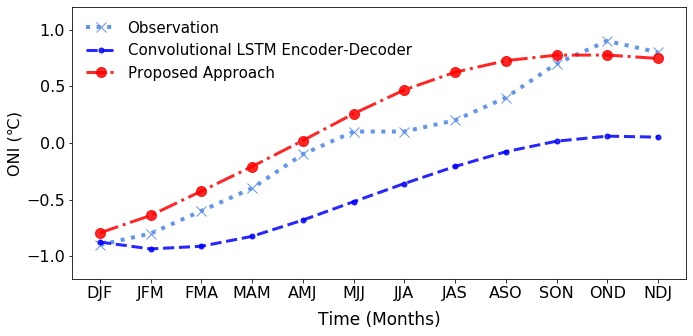

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

Convolutional_2018=np.array([-0.87558562,-0.93619615,-0.91247964,-0.82478344,-0.68148702,-0.51926357,-0.3588599,-0.20808902,-0.07820632,0.01518058,0.05964225,0.05084375])
EMD_Convolutional_2018=np.array([-0.79416986,-0.64054023,-0.42550473,-0.20863876,0.02083103,0.2577673,0.46796689,0.62420577,0.72608301,0.7750132,0.77583415,0.74552253])
actual_values_2018=np.array([-0.9,-0.8,-0.6,-0.4,-0.1,0.1,0.1,0.2,0.4,0.7,0.9,0.8])

plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
plt.plot(index_start,actual_values_2018.reshape(-1),color="cornflowerblue",marker="x",markersize=10,alpha=1,lw=4, linestyle=':',label='Observation')
plt.plot(index_start,Convolutional_2018.reshape(-1),color="blue",marker=".",markersize=10,alpha=0.85,lw=3, linestyle='--',label='Convolutional LSTM Encoder-Decoder')
plt.plot(index_start,EMD_Convolutional_2018.reshape(-1),color="red",marker="o",markersize=10,alpha=0.85,lw=3, linestyle='-.',label='Proposed Approach')


plt.tick_params(labelsize=16)


#y_major_locator=MultipleLocator(0.5)       
#plt.yaxis.set_major_locator(y_major_locator)    
plt.ylim(-1.2,1.2)


#plt.grid(axis="y",lw=1)

plt.xlabel('Time (Months)',fontsize=17,color="black",labelpad=10)
plt.ylabel('ONI (℃)',fontsize=16,color="black")

plt.legend(loc=2,fontsize=15,fancybox=True, framealpha=0) 

plt.show() 

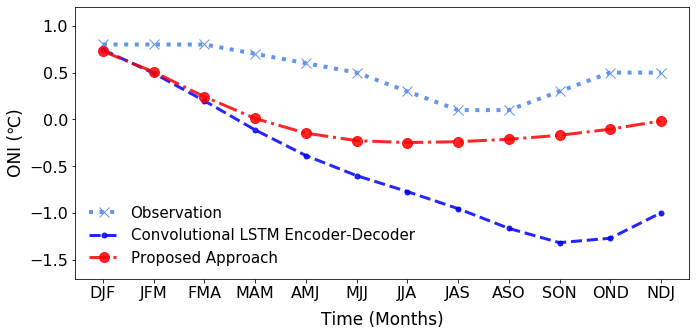

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

Convolutional_2019=np.array([ 0.74358165,0.49313524,0.19863595,-0.11182852,-0.38515815,-0.59922719,-0.76955748,-0.95141959,-1.16197288,-1.31442893,-1.26698041,-0.99607873])
EMD_Convolutional_2019=np.array( [ 0.72770276,0.50730592,0.24294239,0.01046052,-0.14614932,-0.22570921,-0.24667645,-0.23710175,-0.21116881,-0.16871871,-0.103803,-0.01523735])
actual_values_2019=np.array([0.8,0.8,0.8,0.7,0.6,0.5,0.3,0.1,0.1,0.3,0.5,0.5])


plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
plt.plot(index_start,actual_values_2019.reshape(-1),color="cornflowerblue",marker="x",markersize=10,alpha=1,lw=4, linestyle=':',label='Observation')
plt.plot(index_start,Convolutional_2019.reshape(-1),color="blue",marker=".",markersize=10,alpha=0.85,lw=3, linestyle='--',label='Convolutional LSTM Encoder-Decoder')
plt.plot(index_start,EMD_Convolutional_2019.reshape(-1),color="red",marker="o",markersize=10,alpha=0.85,lw=3, linestyle='-.',label='Proposed Approach')


plt.tick_params(labelsize=16)
#ax.yaxis.grid(True,lw=1)
plt.ylim(-1.7,1.2)

plt.xlabel('Time (Months)',fontsize=17,color="black",labelpad=10)
plt.ylabel('ONI (℃)',fontsize=17,color="black")

plt.legend(loc=3,fontsize=15,fancybox=True, framealpha=0) 

plt.show()  

In [9]:
from scipy.stats import pearsonr
import numpy as np
pccs = pearsonr(actual_values_2019,Convolutional_2019)
print ("Pearson correlation coefficient is {0}".format(pccs))

pccs1 = pearsonr(actual_values_2018,Convolutional_2018)
print ("Pearson correlation coefficient is {0}".format(pccs1))

EMD_Convolutional_2018_round=np.around(EMD_Convolutional_2018,2)
Convolutional_2018_round=np.around(Convolutional_2018,2)
EMD_Convolutional_2019_round=np.around(EMD_Convolutional_2019,2)
Convolutional_2019_round=np.around(Convolutional_2019,2)

print (EMD_Convolutional_2018_round)
print (Convolutional_2018_round)
print (actual_values_2018)

print (EMD_Convolutional_2019_round)
print (Convolutional_2019_round)
print (actual_values_2019)

print ("------------------------------------------------")

error_2018_emd_lstm = []
error_2018_lstm=[]
error_2019_emd_lstm = []
error_2019_lstm=[]

re_error_2018_emd_lstm = []
re_error_2018_lstm=[]
re_error_2019_emd_lstm = []
re_error_2019_lstm=[]

for tt in range(len(EMD_Convolutional_2018_round)):
    error_2018_emd_lstm.append(abs(actual_values_2018[tt] - EMD_Convolutional_2018_round[tt]))
    re_error_2018_emd_lstm.append(abs((actual_values_2018[tt] - EMD_Convolutional_2018_round[tt])/actual_values_2018[tt]))
 
print("AE: ", error_2018_emd_lstm)
print(np.around(error_2018_emd_lstm,3))
print ("AE average",np.mean(error_2018_emd_lstm))

print("MAPE: ", re_error_2018_emd_lstm)
print(np.around(re_error_2018_emd_lstm,3))
print ("MAPE average",np.mean(re_error_2018_emd_lstm))


print ('_______________________')

for tt in range(len(Convolutional_2018_round)):
    error_2018_lstm.append(abs(actual_values_2018[tt] - Convolutional_2018_round[tt]))
    re_error_2018_lstm.append(abs((actual_values_2018[tt] - Convolutional_2018_round[tt])/actual_values_2018[tt]))
 
print("AE: ", error_2018_lstm)
print(np.around(error_2018_lstm,3))
print ("AE average",np.mean(error_2018_lstm))
 

print("MAPE: ", re_error_2018_lstm)
print(np.around(re_error_2018_lstm,3))
print ("MAPE average",np.mean(re_error_2018_lstm))
 

   
    
print ('----------------------------2019-----------------------:')

for tt in range(len(EMD_Convolutional_2019_round)):
    error_2019_emd_lstm.append(abs(actual_values_2019[tt] - EMD_Convolutional_2019_round[tt]))
    re_error_2019_emd_lstm.append(abs((actual_values_2019[tt] - EMD_Convolutional_2019_round[tt])/actual_values_2019[tt]))
 
print("AE: ", error_2019_emd_lstm)
print(np.around(error_2019_emd_lstm,3))
print ("AE average",np.mean(error_2019_emd_lstm))

print("MAPE: ", re_error_2019_emd_lstm)
print(np.around(re_error_2019_emd_lstm,2))
print ("MAPE average",np.mean(re_error_2019_emd_lstm))


print ('_______________________')

for tt in range(len(Convolutional_2019_round)):
    error_2019_lstm.append(abs(actual_values_2019[tt] - Convolutional_2019_round[tt]))
    re_error_2019_lstm.append(abs((actual_values_2019[tt] - Convolutional_2019_round[tt])/actual_values_2019[tt]))
 
print("AE: ", error_2019_lstm)
print(np.around(error_2019_lstm,3))
print ("AE average",np.mean(error_2019_lstm))
 

print("MAPE: ", re_error_2019_lstm)
print(np.around(re_error_2019_lstm,3))
print ("MAPE average",np.mean(re_error_2019_lstm))


Pearson correlation coefficient is (0.8271726006127585, 0.0009014400391698338)
Pearson correlation coefficient is (0.965429088727364, 3.6695718817476483e-07)
[-0.79 -0.64 -0.43 -0.21  0.02  0.26  0.47  0.62  0.73  0.78  0.78  0.75]
[-0.88 -0.94 -0.91 -0.82 -0.68 -0.52 -0.36 -0.21 -0.08  0.02  0.06  0.05]
[-0.9 -0.8 -0.6 -0.4 -0.1  0.1  0.1  0.2  0.4  0.7  0.9  0.8]
[ 0.73  0.51  0.24  0.01 -0.15 -0.23 -0.25 -0.24 -0.21 -0.17 -0.1  -0.02]
[ 0.74  0.49  0.2  -0.11 -0.39 -0.6  -0.77 -0.95 -1.16 -1.31 -1.27 -1.  ]
[0.8 0.8 0.8 0.7 0.6 0.5 0.3 0.1 0.1 0.3 0.5 0.5]
------------------------------------------------
AE:  [0.10999999999999999, 0.16000000000000003, 0.16999999999999998, 0.19000000000000003, 0.12000000000000001, 0.16, 0.37, 0.42, 0.32999999999999996, 0.08000000000000007, 0.12, 0.050000000000000044]
[0.11 0.16 0.17 0.19 0.12 0.16 0.37 0.42 0.33 0.08 0.12 0.05]
AE average 0.19000000000000003
MAPE:  [0.1222222222222222, 0.20000000000000004, 0.2833333333333333, 0.47500000000000003, 1.2

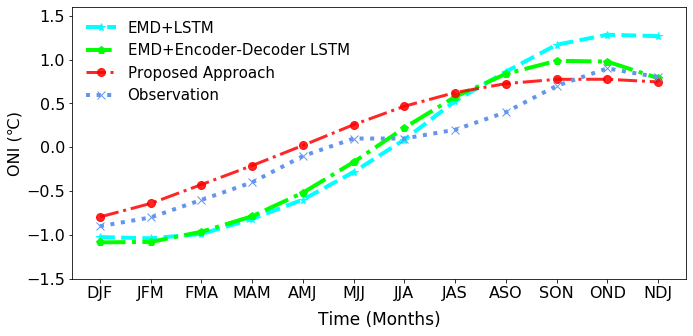

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

Convolutional_2018=np.array([-0.87558562,-0.93619615,-0.91247964,-0.82478344,-0.68148702,-0.51926357,-0.3588599,-0.20808902,-0.07820632,0.01518058,0.05964225,0.05084375])
EMD_Convolutional_2018=np.array([-0.79416986,-0.64054023,-0.42550473,-0.20863876,0.02083103,0.2577673,0.46796689,0.62420577,0.72608301,0.7750132,0.77583415,0.74552253])
actual_values_2018=np.array([-0.9,-0.8,-0.6,-0.4,-0.1,0.1,0.1,0.2,0.4,0.7,0.9,0.8])

solo_lstm_2018=np.array([-1.02414218,-1.03851225,-0.98843682,-0.81726721,-0.59732366,-0.28268347,0.08707089,0.52677304,0.86168703,1.16921931,1.28338614,1.26744952])
three_lstm_2018=np.array([-0.90056228,-0.92775922,-0.88010037,-0.74132941,-0.53632648,-0.2432765,0.11078626,0.38963144,0.69917231,0.83526605,0.89160451,0.85919529])
encoder_lstm_2018=np.array([-1.0846407,-1.07900482,-0.9633422,-0.78667028,-0.51836445,-0.1693093,0.22203026,0.57560947,0.83719155,0.98612001,0.97758619,0.78923514])

plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
#plt.plot(index_start,Convolutional_2018.reshape(-1),color="blue",marker=".",markersize=10,alpha=0.85,lw=3, linestyle='--',label='Convolutional LSTM')

plt.plot(index_start,solo_lstm_2018.reshape(-1),marker="*",markersize=8,color="cyan",alpha=1,lw=4, linestyle='--',label='EMD+LSTM')
#plt.plot(index_start,three_lstm_2018.reshape(-1),marker="v",markersize=8,color="turquoise",alpha=1,lw=3, linestyle='-',label='EMD+Stacked LSTM')
plt.plot(index_start,encoder_lstm_2018.reshape(-1),marker="p",markersize=8,color="lime",alpha=1,lw=4, linestyle='-.',label='EMD+Encoder-Decoder LSTM')
plt.plot(index_start,EMD_Convolutional_2018.reshape(-1),color="red",marker="o",markersize=8,alpha=0.85,lw=3, linestyle='-.',label='Proposed Approach')

plt.plot(index_start,actual_values_2018.reshape(-1),color="cornflowerblue",marker="x",markersize=8,alpha=1,lw=4, linestyle=':',label='Observation')


plt.tick_params(labelsize=16)


#y_major_locator=MultipleLocator(0.5)       
#plt.yaxis.set_major_locator(y_major_locator)    
plt.ylim(-1.5,1.6)


plt.xlabel('Time (Months)',fontsize=17,color="black",labelpad=10)
plt.ylabel('ONI (℃)',fontsize=16,color="black")

plt.legend(loc=2,fontsize=15,fancybox=True, framealpha=0) 

plt.show() 



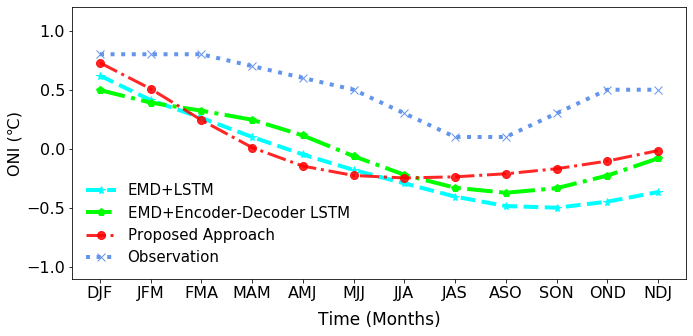

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline

Convolutional_2019=np.array([ 0.74358165,0.49313524,0.19863595,-0.11182852,-0.38515815,-0.59922719,-0.76955748,-0.95141959,-1.16197288,-1.31442893,-1.26698041,-0.99607873])
EMD_Convolutional_2019=np.array( [ 0.72770276,0.50730592,0.24294239,0.01046052,-0.14614932,-0.22570921,-0.24667645,-0.23710175,-0.21116881,-0.16871871,-0.103803,-0.01523735])
actual_values_2019=np.array([0.8,0.8,0.8,0.7,0.6,0.5,0.3,0.1,0.1,0.3,0.5,0.5])


solo_lstm_2019=np.array([ 0.61905206,0.4115035,0.261914,0.09999985,-0.04762822,-0.17882729,-0.29223554,-0.40439983,-0.48433958,-0.49855177,-0.44724944,-0.36614515])
three_lstm_2019=np.array([ 5.31986887e-01,3.53261476e-01,2.50292839e-01,1.71690989e-01,1.07566571e-01,6.01171795e-02,3.47889550e-02,-1.33953113e-02,-3.10588703e-02,-6.63700160e-02,-4.70849108e-02,-1.90380961e-05])
encoder_lstm_2019=np.array([ 0.49664097,0.39082556,0.32237265,0.24579028,0.11304352,-0.06206368,-0.22000969,-0.32929522,-0.3719657,-0.33318857,-0.22688565,-0.0809826 ])



plt.figure(figsize=(11,5))
index_start = np.array(range(1,13))
index_start = ["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

#plt.title("Actual Values And Predicting Values",fontstyle="italic",fontsize=24)
#plt.plot(index_start,Convolutional_2019.reshape(-1),color="blue",marker=".",markersize=10,alpha=0.85,lw=3, linestyle='--',label='Convolutional LSTM')


plt.plot(index_start,solo_lstm_2019.reshape(-1),marker="*",markersize=8,color="cyan",alpha=1,lw=4, linestyle='--',label='EMD+LSTM')
#plt.plot(index_start,three_lstm_2019.reshape(-1),marker="v",markersize=8,color="turquoise",alpha=1,lw=3, linestyle='-',label='EMD+Stacked LSTM')
plt.plot(index_start,encoder_lstm_2019.reshape(-1),marker="p",markersize=8,color="lime",alpha=1,lw=4, linestyle='-.',label='EMD+Encoder-Decoder LSTM')
plt.plot(index_start,EMD_Convolutional_2019.reshape(-1),color="red",marker="o",markersize=8,alpha=0.85,lw=3, linestyle='-.',label='Proposed Approach')
plt.plot(index_start,actual_values_2019.reshape(-1),color="cornflowerblue",marker="x",markersize=8,alpha=1,lw=4, linestyle=':',label='Observation')


plt.tick_params(labelsize=16)


#y_major_locator=MultipleLocator(0.5)       
#plt.yaxis.set_major_locator(y_major_locator)    
plt.ylim(-1.1,1.2)


plt.xlabel('Time (Months)',fontsize=17,color="black",labelpad=10)
plt.ylabel('ONI (℃)',fontsize=16,color="black")

plt.legend(loc=3,fontsize=15,fancybox=True, framealpha=0) 

plt.show() 




In [12]:
from scipy.stats import pearsonr


pccs = pearsonr(actual_values_2019,EMD_Convolutional_2019)
print ("Pearson correlation coefficient is {0}".format(pccs))

pccs = pearsonr(solo_lstm_2019,EMD_Convolutional_2019)
print ("Pearson correlation coefficient is {0}".format(pccs))

pccs = pearsonr(three_lstm_2019,EMD_Convolutional_2019)
print ("Pearson correlation coefficient is {0}".format(pccs))

pccs = pearsonr(encoder_lstm_2019,EMD_Convolutional_2019)
print ("Pearson correlation coefficient is {0}".format(pccs))



print (solo_lstm_2018)
print (encoder_lstm_2018)
print (actual_values_2018)

print (solo_lstm_2019)
print (encoder_lstm_2019)
print (actual_values_2019)

print ('----------------------------2018-----------------------:')


error_2018_solo_lstm=[]
error_2018_three_lstm=[]
error_2018_encoder_lstm=[]

re_error_2018_solo_lstm=[]
re_error_2018_three_lstm=[]
re_error_2018_encoder_lstm=[]




for tt in range(len(EMD_Convolutional_2018_round)):
    error_2018_solo_lstm.append(abs(actual_values_2018[tt] - solo_lstm_2018[tt]))
    re_error_2018_solo_lstm.append(abs((actual_values_2018[tt] - solo_lstm_2018[tt])/actual_values_2018[tt]))
 
print("AE: ", error_2018_solo_lstm)
print(np.around(error_2018_solo_lstm,2))
print ("AE average",np.mean(error_2018_solo_lstm))

print("MAPE: ", re_error_2018_solo_lstm)
print(np.around(re_error_2018_solo_lstm,2))
print ("MAPE average",np.mean(re_error_2018_solo_lstm))


print ('_____________________________________________')

for tt in range(len(Convolutional_2018_round)):
    error_2018_three_lstm.append(abs(actual_values_2018[tt] - three_lstm_2018[tt]))
    re_error_2018_three_lstm.append(abs((actual_values_2018[tt] - three_lstm_2018[tt])/actual_values_2018[tt]))
 
print("AE: ", error_2018_three_lstm)
print(np.around(error_2018_three_lstm,2))
print ("AE average",np.mean(error_2018_three_lstm))
 

print("MAPE: ", re_error_2018_three_lstm)
print(np.around(re_error_2018_three_lstm,2))
print ("MAPE average",np.mean(re_error_2018_three_lstm))
 

    
print ('_____________________________________________')

for tt in range(len(Convolutional_2018_round)):
    error_2018_encoder_lstm.append(abs(actual_values_2018[tt] - encoder_lstm_2018[tt]))
    re_error_2018_encoder_lstm.append(abs((actual_values_2018[tt] - encoder_lstm_2018[tt])/actual_values_2018[tt]))
 
print("AE: ", error_2018_encoder_lstm)
print(np.around(error_2018_encoder_lstm,2))
print ("AE average",np.mean(error_2018_encoder_lstm))
 

print("MAPE: ", re_error_2018_encoder_lstm)
print(np.around(re_error_2018_encoder_lstm,2))
print ("MAPE average",np.mean(re_error_2018_encoder_lstm))


    
print ('----------------------------2019-----------------------:')

error_2019_solo_lstm=[]
error_2019_three_lstm=[]
error_2019_encoder_lstm=[]

re_error_2019_solo_lstm=[]
re_error_2019_three_lstm=[]
re_error_2019_encoder_lstm=[]




for tt in range(len(EMD_Convolutional_2019_round)):
    error_2019_solo_lstm.append(abs(actual_values_2019[tt] - solo_lstm_2019[tt]))
    re_error_2019_solo_lstm.append(abs((actual_values_2019[tt] - solo_lstm_2019[tt])/actual_values_2019[tt]))
 
print("AE: ", error_2019_solo_lstm)
print(np.around(error_2019_solo_lstm,2))
print ("AE average",np.mean(error_2019_solo_lstm))

print("MAPE: ", re_error_2019_solo_lstm)
print(np.around(re_error_2019_solo_lstm,2))
print ("MAPE average",np.mean(re_error_2019_solo_lstm))


print ('_____________________________________________')

for tt in range(len(Convolutional_2019_round)):
    error_2019_three_lstm.append(abs(actual_values_2019[tt] - three_lstm_2019[tt]))
    re_error_2019_three_lstm.append(abs((actual_values_2019[tt] - three_lstm_2019[tt])/actual_values_2019[tt]))
 
print("AE: ", error_2019_three_lstm)
print(np.around(error_2019_three_lstm,2))
print ("AE average",np.mean(error_2019_three_lstm))
 

print("MAPE: ", re_error_2019_three_lstm)
print(np.around(re_error_2019_three_lstm,2))
print ("MAPE average",np.mean(re_error_2019_three_lstm))
 

    
print ('_____________________________________________')

for tt in range(len(Convolutional_2019_round)):
    error_2019_encoder_lstm.append(abs(actual_values_2019[tt] - encoder_lstm_2019[tt]))
    re_error_2019_encoder_lstm.append(abs((actual_values_2019[tt] - encoder_lstm_2019[tt])/actual_values_2019[tt]))
 
print("AE: ", error_2019_encoder_lstm)
print(np.around(error_2019_encoder_lstm,2))
print ("AE average",np.mean(error_2019_encoder_lstm))
 

print("MAPE: ", re_error_2019_encoder_lstm)
print(np.around(re_error_2019_encoder_lstm,2))
print ("MAPE average",np.mean(re_error_2019_encoder_lstm))






Pearson correlation coefficient is (0.7726905489465898, 0.0032159569565848303)
Pearson correlation coefficient is (0.8958055206613929, 8.100722986473905e-05)
Pearson correlation coefficient is (0.9334297639311758, 9.201228923658496e-06)
Pearson correlation coefficient is (0.8612052170246635, 0.00031982613284659706)
[-1.02414218 -1.03851225 -0.98843682 -0.81726721 -0.59732366 -0.28268347
  0.08707089  0.52677304  0.86168703  1.16921931  1.28338614  1.26744952]
[-1.0846407  -1.07900482 -0.9633422  -0.78667028 -0.51836445 -0.1693093
  0.22203026  0.57560947  0.83719155  0.98612001  0.97758619  0.78923514]
[-0.9 -0.8 -0.6 -0.4 -0.1  0.1  0.1  0.2  0.4  0.7  0.9  0.8]
[ 0.61905206  0.4115035   0.261914    0.09999985 -0.04762822 -0.17882729
 -0.29223554 -0.40439983 -0.48433958 -0.49855177 -0.44724944 -0.36614515]
[ 0.49664097  0.39082556  0.32237265  0.24579028  0.11304352 -0.06206368
 -0.22000969 -0.32929522 -0.3719657  -0.33318857 -0.22688565 -0.0809826 ]
[0.8 0.8 0.8 0.7 0.6 0.5 0.3 0.1 0